# Analysis of algorithmic, hedge, and mutual fund portfolios compared to the S&P 500
----------------------------------------------------------------------------------------------------------------------------------------------------

In [1680]:
# Import necessary libraries
import pandas as pd
import numpy as np
import datetime as dt
from pathlib import Path
import seaborn as sns
%matplotlib inline

# Data Cleaning
The csv files for the different portfolios will be read into DataFrames and the data will be cleaned.
Files:
    1. whale_returns_csv
    2. algo_returns.csv
    3. sp500_history.csv


## Whale Returns
Read Whale returns csv and clean the data

In [1677]:
# Setting filepaths
whale_file_path = Path('../../Desktop/RU-HOU-FIN-PT-07-2019-U-C/hw/03-Python_and_Pandas/Instructions/Resources/whale_returns.csv')
algo_file_path = Path('../../Desktop/RU-HOU-FIN-PT-07-2019-U-C/hw/03-Python_and_Pandas/Instructions/Resources/algo_returns.csv')
sp500_file_path = Path('../../Desktop/RU-HOU-FIN-PT-07-2019-U-C/hw/03-Python_and_Pandas/Instructions/Resources/sp500_history.csv')


In [1582]:
# Reading whale returns
whale_returns_csv = pd.read_csv(whale_file_path, index_col = 'Date', parse_dates = True, infer_datetime_format = True)
whale_returns_csv.head()



,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-02,NaN,NaN,NaN,NaN
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,0.002230,0.003241,-0.002534,0.004213
2015-03-05,0.004016,0.004076,0.002355,0.006726
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098


In [1583]:
# Checking the index's data type
whale_returns_csv.index.dtype

dtype('<M8[ns]')

In [1584]:
# Taking a sample of the data
whale_returns_csv.sample(10)

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2016-06-14,-0.004825,0.002466,-0.000772,-0.001768
2016-01-18,0.000000,0.000000,0.000000,0.000000
2015-10-06,0.000812,-0.000969,-0.005172,-0.016468
2015-08-20,-0.019236,-0.014526,-0.019340,-0.047108
2015-04-06,0.005368,0.003763,0.004631,0.004920
2017-10-03,0.002102,-0.001288,0.003404,0.007965
2016-11-14,-0.005901,0.001865,-0.010162,-0.019407
2017-09-26,0.000491,-0.003815,0.002020,-0.006081
2018-11-16,0.005377,-0.000211,-0.002211,-0.009001


In [1585]:
# Checking tail of data
whale_returns_csv.tail()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2019-04-25,-0.000285,-0.001291,-0.005153,0.004848
2019-04-26,0.008149,0.009162,0.012355,0.010434
2019-04-29,0.001254,0.002719,0.006251,0.005223
2019-04-30,-0.001295,-0.002211,-0.000259,-0.003702
2019-05-01,-0.005847,-0.001341,-0.007936,-0.007833


In [1586]:
# Inspecting data furthur
whale_returns_csv.describe()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
count,1059.000000,1059.000000,1059.000000,1059.000000
mean,0.000179,-0.000203,-0.000081,0.000501
std,0.007842,0.006977,0.010824,0.012831
min,-0.032711,-0.032099,-0.139820,-0.066505
25%,-0.003594,-0.003961,-0.004746,-0.005515
50%,0.000467,0.000000,0.000232,0.000617
75%,0.004292,0.003567,0.005176,0.007516
max,0.042977,0.029338,0.080705,0.061341


In [1587]:
# Checking the columns data types
whale_returns_csv.dtypes

SOROS FUND MANAGEMENT LLC      float64
PAULSON & CO.INC.              float64
TIGER GLOBAL MANAGEMENT LLC    float64
BERKSHIRE HATHAWAY INC         float64
dtype: object

In [1588]:
# Checking each columns row count
whale_returns_csv.count()

SOROS FUND MANAGEMENT LLC      1059
PAULSON & CO.INC.              1059
TIGER GLOBAL MANAGEMENT LLC    1059
BERKSHIRE HATHAWAY INC         1059
dtype: int64

In [1589]:
# Finding percentage of null values
whale_returns_csv.isnull().mean() * 100

SOROS FUND MANAGEMENT LLC      0.09434
PAULSON & CO.INC.              0.09434
TIGER GLOBAL MANAGEMENT LLC    0.09434
BERKSHIRE HATHAWAY INC         0.09434
dtype: float64

In [1590]:
# Finding number of null values
whale_returns_csv.isnull().sum()

SOROS FUND MANAGEMENT LLC      1
PAULSON & CO.INC.              1
TIGER GLOBAL MANAGEMENT LLC    1
BERKSHIRE HATHAWAY INC         1
dtype: int64

In [1591]:
# Dropping nulls
whale_returns_csv = whale_returns_csv.dropna()
whale_returns_csv.isnull().sum()

SOROS FUND MANAGEMENT LLC      0
PAULSON & CO.INC.              0
TIGER GLOBAL MANAGEMENT LLC    0
BERKSHIRE HATHAWAY INC         0
dtype: int64

In [1592]:
# Checking for duplicates
whale_returns_csv.index.duplicated().sum()


0

In [1593]:
algo_daily_returns_csv = pd.read_csv(algo_file_path, index_col = 'Date', parse_dates = True, infer_datetime_format = True)
algo_daily_returns_csv.head()

,Algo 1,Algo 2
Date,,
2014-05-28,0.001745,NaN
2014-05-29,0.003978,NaN
2014-05-30,0.004464,NaN
2014-06-02,0.005692,NaN
2014-06-03,0.005292,NaN


In [1594]:
algo_daily_returns_csv.index.dtype

dtype('<M8[ns]')

In [1595]:
algo_daily_returns_csv.tail()

,Algo 1,Algo 2
Date,,
2019-04-25,0.000682,-0.007247
2019-04-26,0.002981,0.005256
2019-04-29,0.005208,0.002829
2019-04-30,-0.002944,-0.001570
2019-05-01,0.000094,-0.007358


In [1596]:
algo_daily_returns_csv.sample(10)

,Algo 1,Algo 2
Date,,
2015-12-22,0.015359,0.006436
2017-05-30,-0.012335,-0.005713
2016-07-13,-0.000398,-0.003027
2015-07-15,-0.009468,-0.004188
2016-07-05,-0.026304,-0.009556
2017-04-27,-0.005333,-0.001183
2016-07-26,0.005465,0.006156
2016-12-30,-0.002822,-0.000829
2019-01-31,-0.001333,0.009743


In [1597]:
algo_daily_returns_csv.describe()

,Algo 1,Algo 2
count,1241.000000,1235.000000
mean,0.000667,0.000341
std,0.007972,0.008466
min,-0.030951,-0.036937
25%,-0.003238,-0.003733
50%,0.000135,0.000581
75%,0.003978,0.005194
max,0.098246,0.083734


In [1598]:
algo_daily_returns_csv.dtypes

Algo 1    float64
Algo 2    float64
dtype: object

In [1599]:
algo_daily_returns_csv.count()

Algo 1    1241
Algo 2    1235
dtype: int64

In [1600]:
algo_daily_returns_csv.isnull().mean() * 100

Algo 1    0.000000
Algo 2    0.483481
dtype: float64

In [1601]:
algo_daily_returns_csv.isnull().sum()

C:\Users\willi\Anaconda3\lib\site-packages\IPython\core\displayhook.py:276: UserWarning: Output cache limit (currently 1000 entries) hit.
Flushing oldest 200 entries.
  'Flushing oldest {cull_count} entries.'.format(sz=sz, cull_count=cull_count))


Algo 1    0
Algo 2    6
dtype: int64

In [1602]:
algo_daily_returns_csv = algo_daily_returns_csv.dropna()

In [1603]:
algo_daily_returns_csv.isnull().sum()

Algo 1    0
Algo 2    0
dtype: int64

In [1604]:
algo_daily_returns_csv.duplicated(keep='first').sum()

0

In [1605]:
algo_daily_returns_csv.count()

Algo 1    1235
Algo 2    1235
dtype: int64

In [1606]:
sp500_returns = pd.read_csv(sp500_file_path, index_col = 'Date', parse_dates = True, infer_datetime_format = True)
sp500_returns.head()

,Close
Date,
2019-04-23,$2933.68
2019-04-22,$2907.97
2019-04-18,$2905.03
2019-04-17,$2900.45
2019-04-16,$2907.06


In [1607]:
sp500_returns.index.dtype

dtype('<M8[ns]')

In [1608]:
sp500_returns.tail()

,Close
Date,
2012-10-05,$1460.93
2012-10-04,$1461.40
2012-10-03,$1450.99
2012-10-02,$1445.75
2012-10-01,$1444.49


In [1609]:
sp500_returns = sp500_returns.sort_index()

In [1610]:
sp500_returns.head()

,Close
Date,
2012-10-01,$1444.49
2012-10-02,$1445.75
2012-10-03,$1450.99
2012-10-04,$1461.40
2012-10-05,$1460.93


In [1611]:
sp500_returns.sample(10)

,Close
Date,
2016-09-28,$2171.37
2015-07-31,$2103.84
2015-09-02,$1948.86
2017-10-10,$2550.64
2016-06-13,$2079.06
2013-04-30,$1597.57
2017-04-04,$2360.16
2013-11-19,$1787.87
2018-02-21,$2701.33


In [1612]:
sp500_returns.describe()

,Close
count,1649
unique,1639
top,$2373.47
freq,2


In [1613]:
sp500_returns.dtypes

Close    object
dtype: object

In [1614]:
sp500_returns['Close'] = sp500_returns['Close'].str.replace('$', '' )
sp500_returns.head()

,Close
Date,
2012-10-01,1444.49
2012-10-02,1445.75
2012-10-03,1450.99
2012-10-04,1461.40
2012-10-05,1460.93


In [1615]:
sp500_returns['Close'] = sp500_returns['Close'].astype('float')
sp500_returns.dtypes

Close    float64
dtype: object

In [1616]:
sp500_returns.count()

Close    1649
dtype: int64

In [1617]:
sp500_returns[sp500_returns.duplicated()]

,Close
Date,
2015-06-04,2095.84
2015-06-09,2080.15
2015-09-30,1920.03
2015-11-04,2102.31
2016-05-16,2066.66
2016-06-09,2115.48
2017-01-10,2268.90
2017-03-20,2373.47
2017-06-26,2439.07


In [1618]:

sp500_returns.count()

Close    1649
dtype: int64

In [1619]:
sp500_returns = sp500_returns.pct_change()
sp500_returns.head()

,Close
Date,
2012-10-01,NaN
2012-10-02,0.000872
2012-10-03,0.003624
2012-10-04,0.007174
2012-10-05,-0.000322


In [1620]:
sp500_returns.isnull().mean() * 100

Close    0.060643
dtype: float64

In [1621]:
sp500_returns.isnull().sum()

Close    1
dtype: int64

In [1622]:
sp500_returns = sp500_returns.dropna()
sp500_returns.isnull().sum()

Close    0
dtype: int64

In [1623]:
sp500_returns = sp500_returns.rename(columns = {'Close':'S&P 500'})
sp500_returns.head()

,S&P 500
Date,
2012-10-02,0.000872
2012-10-03,0.003624
2012-10-04,0.007174
2012-10-05,-0.000322
2012-10-08,-0.003457


In [1624]:
all_returns = pd.concat([whale_returns_csv, algo_daily_returns_csv, sp500_returns], axis =1 , join = 'inner')
all_returns.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P 500
Date,,,,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949,-0.004539
2015-03-04,0.002230,0.003241,-0.002534,0.004213,-0.008589,0.002416,-0.004389
2015-03-05,0.004016,0.004076,0.002355,0.006726,-0.000955,0.004323,0.001196
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098,-0.004957,-0.011460,-0.014174
2015-03-09,0.000582,0.004225,0.005843,-0.001652,-0.005447,0.001303,0.003944


In [1625]:
all_returns.tail()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P 500
Date,,,,,,,
2019-04-16,0.002699,0.000388,-0.000831,0.000837,-0.006945,0.002899,0.000509
2019-04-17,-0.002897,-0.006467,-0.004409,0.003222,-0.010301,-0.005228,-0.002274
2019-04-18,0.001448,0.001222,0.000582,0.001916,-0.000588,-0.001229,0.001579
2019-04-22,-0.002586,-0.007333,-0.003640,-0.001088,0.000677,-0.001936,0.001012
2019-04-23,0.007167,0.003485,0.006472,0.013278,0.004969,0.009622,0.008841


In [1626]:
all_returns.index = pd.to_datetime(all_returns.index) 
all_returns.index.dtype

dtype('<M8[ns]')

In [1627]:
all_returns.isnull().sum()

SOROS FUND MANAGEMENT LLC      0
PAULSON & CO.INC.              0
TIGER GLOBAL MANAGEMENT LLC    0
BERKSHIRE HATHAWAY INC         0
Algo 1                         0
Algo 2                         0
S&P 500                        0
dtype: int64

In [1628]:
all_returns.dtypes

SOROS FUND MANAGEMENT LLC      float64
PAULSON & CO.INC.              float64
TIGER GLOBAL MANAGEMENT LLC    float64
BERKSHIRE HATHAWAY INC         float64
Algo 1                         float64
Algo 2                         float64
S&P 500                        float64
dtype: object

In [1629]:
all_returns.duplicated().sum()

0

In [1630]:
all_returns.count()

SOROS FUND MANAGEMENT LLC      1043
PAULSON & CO.INC.              1043
TIGER GLOBAL MANAGEMENT LLC    1043
BERKSHIRE HATHAWAY INC         1043
Algo 1                         1043
Algo 2                         1043
S&P 500                        1043
dtype: int64

In [1631]:
all_returns.tail()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P 500
Date,,,,,,,
2019-04-16,0.002699,0.000388,-0.000831,0.000837,-0.006945,0.002899,0.000509
2019-04-17,-0.002897,-0.006467,-0.004409,0.003222,-0.010301,-0.005228,-0.002274
2019-04-18,0.001448,0.001222,0.000582,0.001916,-0.000588,-0.001229,0.001579
2019-04-22,-0.002586,-0.007333,-0.003640,-0.001088,0.000677,-0.001936,0.001012
2019-04-23,0.007167,0.003485,0.006472,0.013278,0.004969,0.009622,0.008841


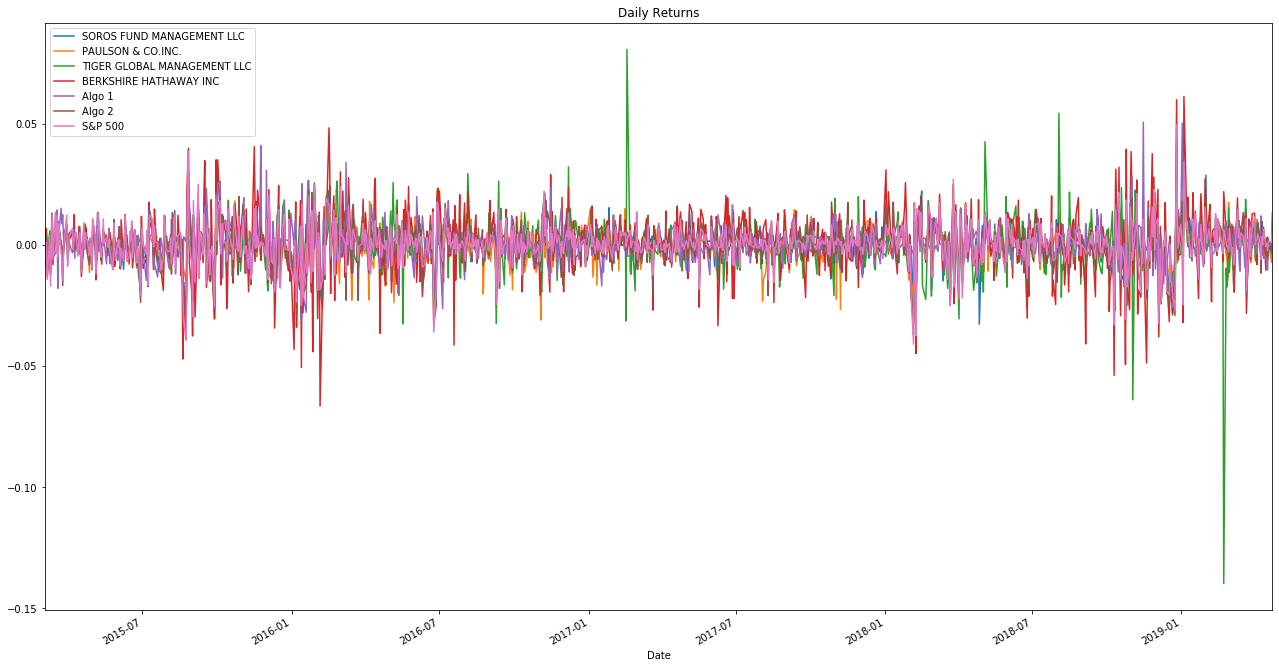

In [1632]:
all_returns.plot(title = 'Daily Returns', legend = True, figsize = (22,12))


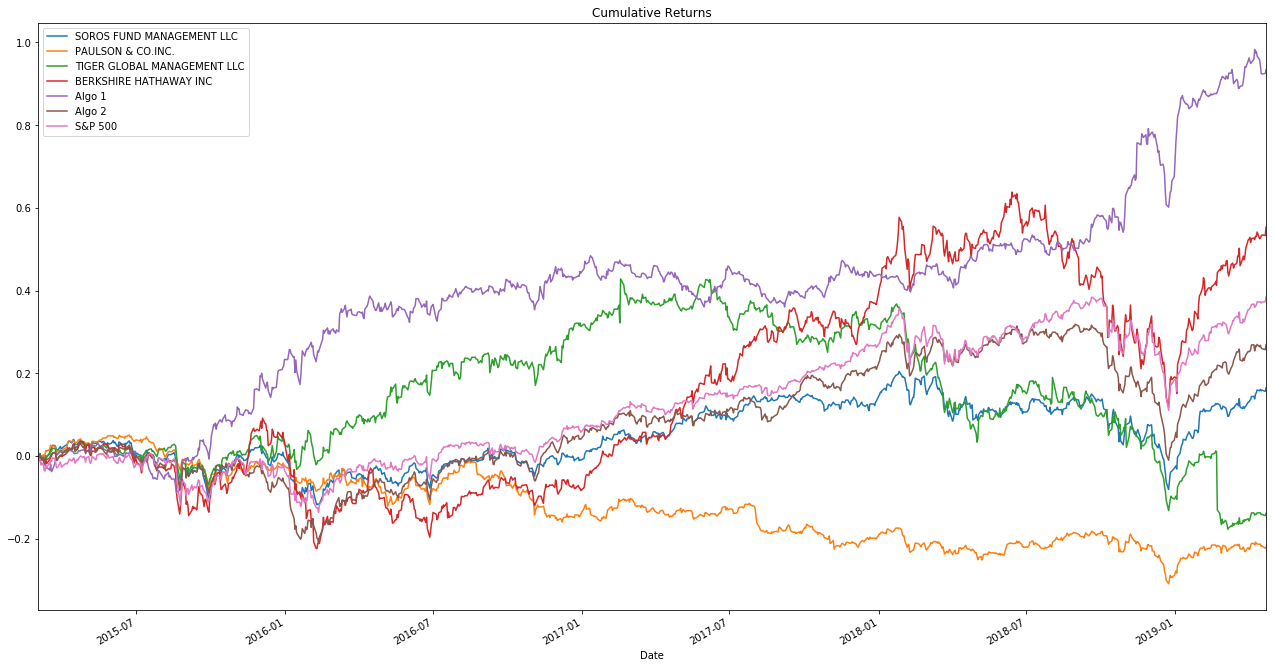

In [1633]:
cumulative_returns = (1 + all_returns).cumprod() - 1
cumulative_returns.plot(title = 'Cumulative Returns', legend = True, figsize =(22,12))

In [1634]:
cumulative_returns_by_year = all_returns.groupby(all_returns.index.year).apply(lambda x: (1+x).cumprod() - 1)
annual_returns = cumulative_returns_by_year.groupby(cumulative_returns_by_year.index.year).last()
annual_returns.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P 500
Date,,,,,,,
2015,-0.003019,-0.023685,0.027644,0.034440,0.233385,-0.065759,-0.034689
2016,-0.006991,-0.119136,0.278194,-0.114539,0.169350,0.113744,0.095350
2017,0.144073,-0.069746,-0.000498,0.491562,-0.003228,0.162514,0.194200
2018,-0.143357,-0.111315,-0.317783,-0.128091,0.165843,-0.141432,-0.062373
2019,0.200247,0.096603,-0.038493,0.304057,0.154337,0.222163,0.170265


In [1635]:
annual_returns.loc[2017].sort_values(ascending = False)

BERKSHIRE HATHAWAY INC         0.491562
S&P 500                        0.194200
Algo 2                         0.162514
SOROS FUND MANAGEMENT LLC      0.144073
TIGER GLOBAL MANAGEMENT LLC   -0.000498
Algo 1                        -0.003228
PAULSON & CO.INC.             -0.069746
Name: 2017, dtype: float64

In [1636]:
cumulative_returns_by_month = all_returns.groupby(pd.Grouper(freq = 'M')).apply(lambda x: (1+x).cumprod() - 1)
monthly_returns = cumulative_returns_by_month.groupby(pd.Grouper(freq='M')).last()
monthly_returns.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P 500
Date,,,,,,,
2015-03-31,0.017207,0.011306,0.009419,0.002310,0.012788,-0.000962,-0.023378
2015-04-30,0.003248,0.016876,0.010373,0.011927,-0.007167,0.009620,0.008521
2015-05-31,0.008094,0.019797,-0.001410,0.001002,0.009439,0.000920,0.010491
2015-06-30,-0.020352,-0.011427,-0.023138,-0.020195,-0.003230,-0.009999,-0.021012
2015-07-31,-0.014779,-0.018293,0.020172,-0.021668,-0.051560,-0.016582,0.019742


In [1637]:
monthly_returns.loc['2018-12-31'].sort_values(ascending = False)

Algo 1                        -0.055161
BERKSHIRE HATHAWAY INC        -0.089757
PAULSON & CO.INC.             -0.091320
S&P 500                       -0.091777
SOROS FUND MANAGEMENT LLC     -0.095657
Algo 2                        -0.119221
TIGER GLOBAL MANAGEMENT LLC   -0.144032
Name: 2018-12-31 00:00:00, dtype: float64

In [1638]:
daily_std = all_returns.std().sort_values()
daily_std.head(10)

PAULSON & CO.INC.              0.007023
Algo 1                         0.007620
SOROS FUND MANAGEMENT LLC      0.007895
Algo 2                         0.008342
S&P 500                        0.008554
TIGER GLOBAL MANAGEMENT LLC    0.010894
BERKSHIRE HATHAWAY INC         0.012919
dtype: float64

In [1639]:
daily_std > daily_std[4]

PAULSON & CO.INC.              False
Algo 1                         False
SOROS FUND MANAGEMENT LLC      False
Algo 2                         False
S&P 500                        False
TIGER GLOBAL MANAGEMENT LLC     True
BERKSHIRE HATHAWAY INC          True
dtype: bool

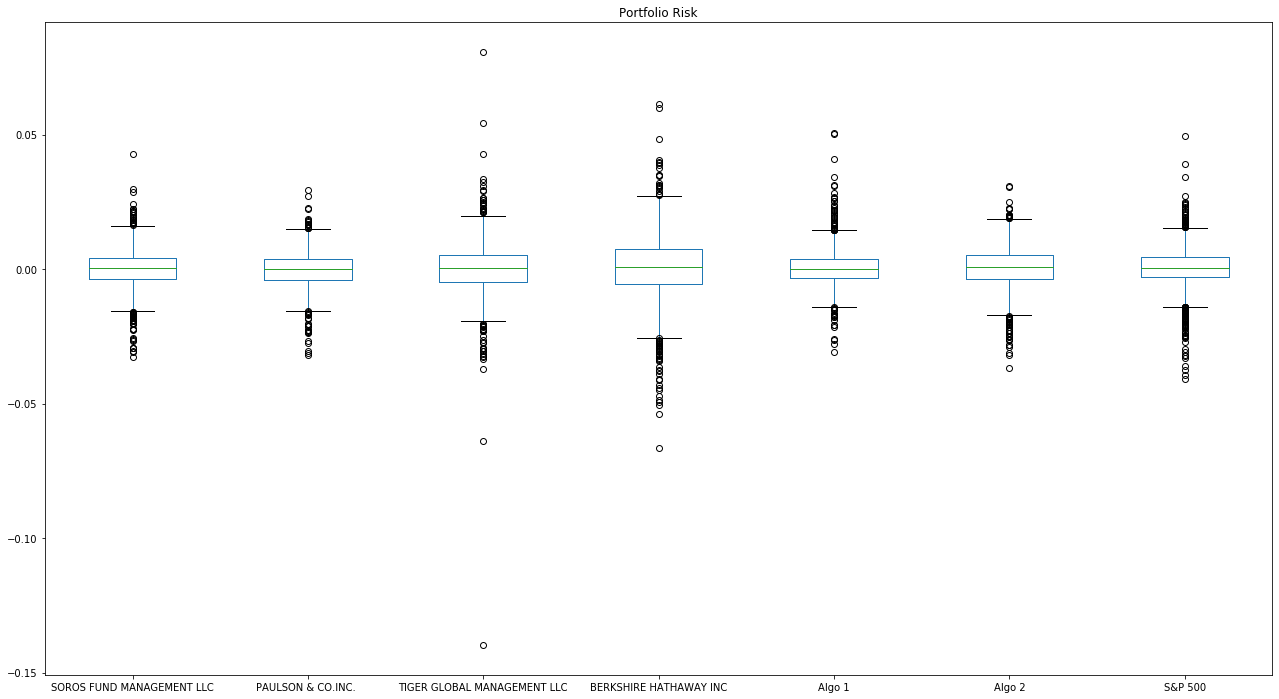

In [1640]:
all_returns.plot(kind = 'box', figsize = (22,12), title = 'Portfolio Risk')

In [1641]:
annualized_std = daily_std * np.sqrt(252)
annualized_std.head(10)

PAULSON & CO.INC.              0.111488
Algo 1                         0.120967
SOROS FUND MANAGEMENT LLC      0.125335
Algo 2                         0.132430
S&P 500                        0.135786
TIGER GLOBAL MANAGEMENT LLC    0.172936
BERKSHIRE HATHAWAY INC         0.205077
dtype: float64

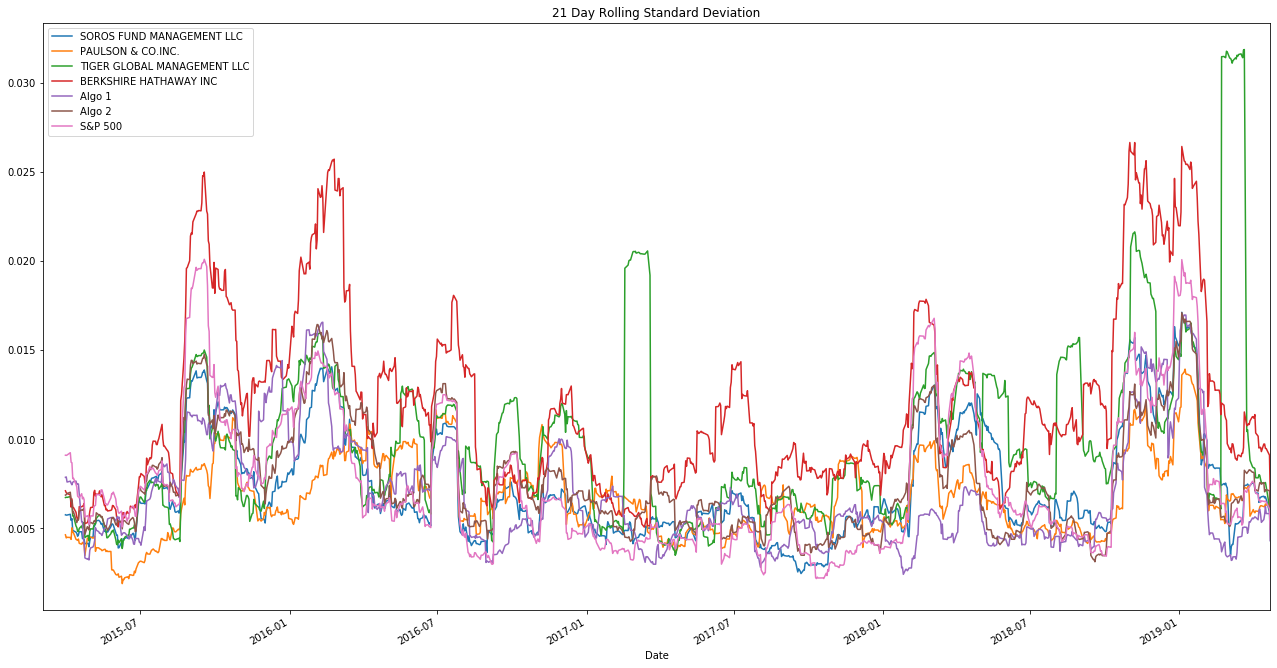

In [1642]:
all_returns.rolling(window = 21).std().plot(title = '21 Day Rolling Standard Deviation', figsize= (22,12))

In [1643]:
correlation = all_returns.corr()
correlation.head(10)

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P 500
SOROS FUND MANAGEMENT LLC,1.000000,0.699914,0.561243,0.754360,0.321211,0.826873,0.837864
PAULSON & CO.INC.,0.699914,1.000000,0.434479,0.545623,0.268840,0.678152,0.669732
TIGER GLOBAL MANAGEMENT LLC,0.561243,0.434479,1.000000,0.424423,0.164387,0.507414,0.623946
BERKSHIRE HATHAWAY INC,0.754360,0.545623,0.424423,1.000000,0.292033,0.688082,0.751371
Algo 1,0.321211,0.268840,0.164387,0.292033,1.000000,0.288243,0.279494
Algo 2,0.826873,0.678152,0.507414,0.688082,0.288243,1.000000,0.858764
S&P 500,0.837864,0.669732,0.623946,0.751371,0.279494,0.858764,1.000000


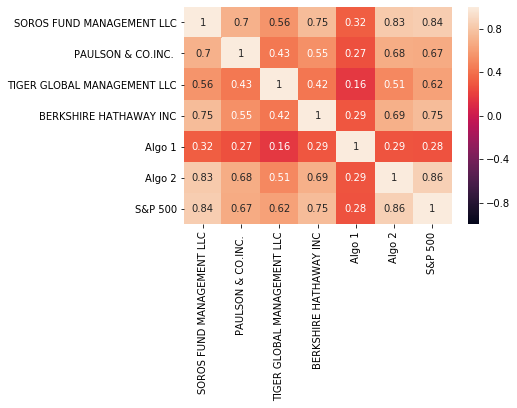

In [1644]:
sns.heatmap(correlation, vmin = -1, vmax = 1, annot = True)

In [1645]:
rolling_covariance = all_returns['BERKSHIRE HATHAWAY INC'].rolling(window = 60).cov(all_returns['S&P 500'])


In [1646]:
rolling_variance = all_returns['S&P 500'].rolling(window = 60).var()


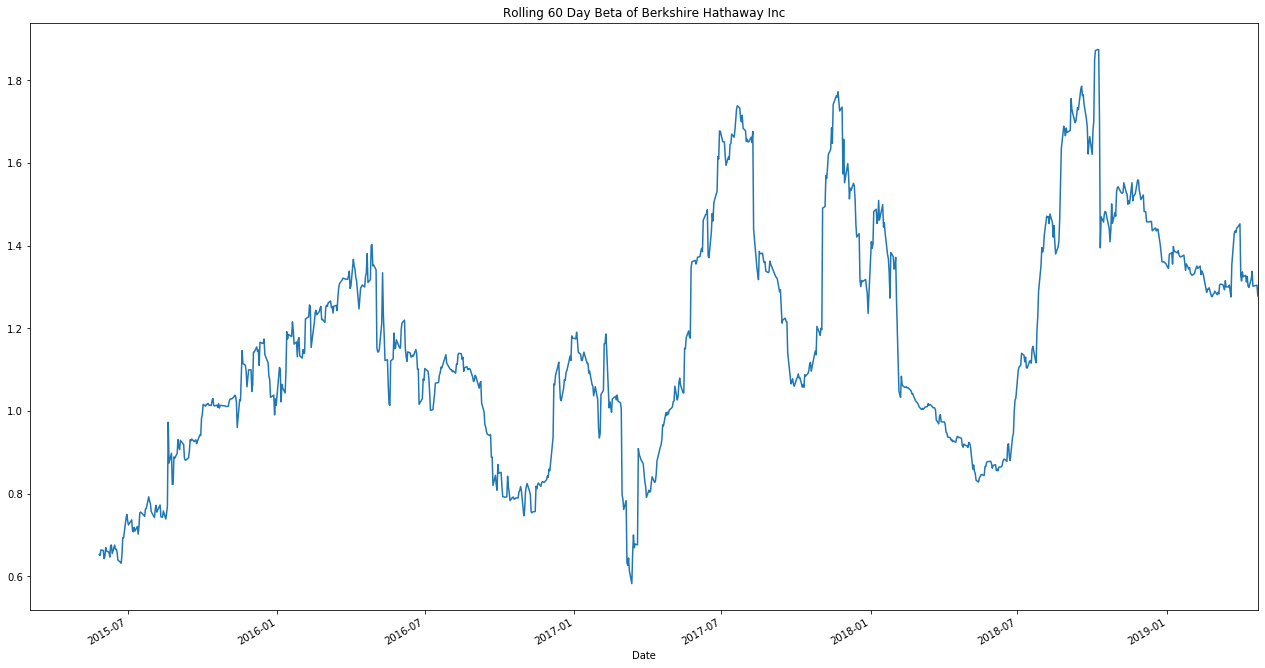

In [1647]:
rolling_berkshire_beta = rolling_covariance / rolling_variance
rolling_berkshire_beta.plot(figsize =(22,12), title = 'Rolling 60 Day Beta of Berkshire Hathaway Inc')

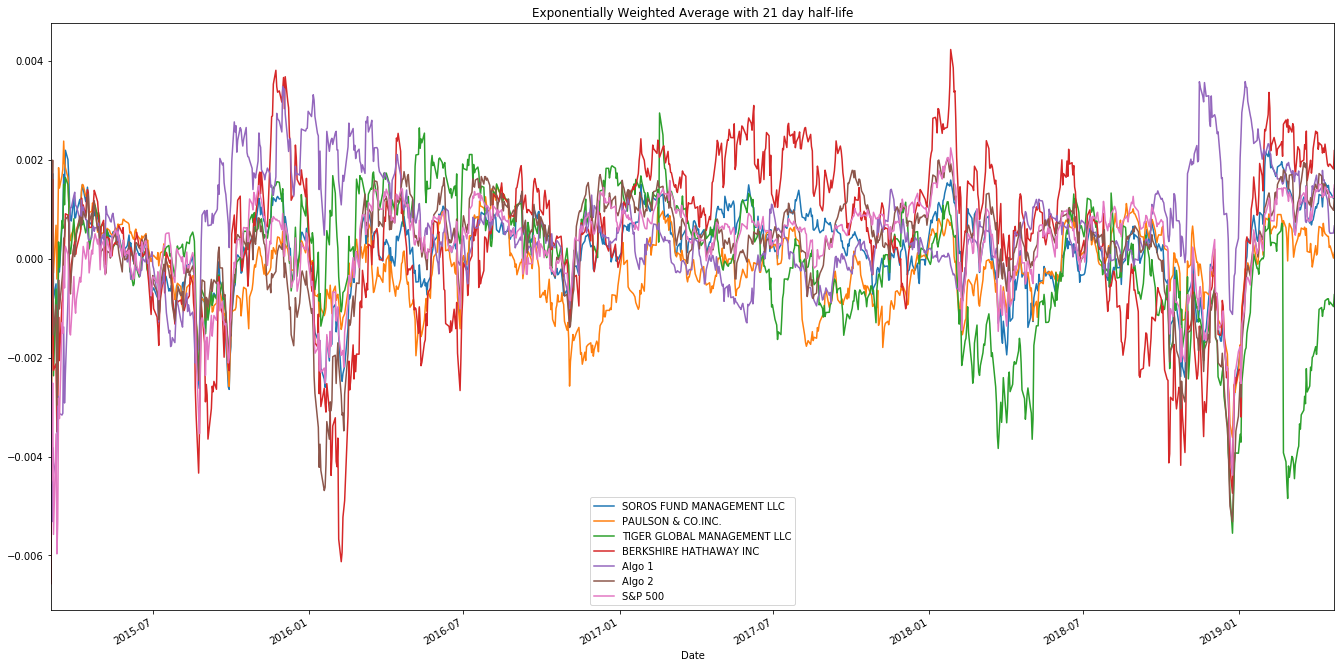

In [1648]:
all_returns.ewm(halflife = 21).mean().plot(figsize = (23,12), title= 'Exponentially Weighted Average with 21 day half-life')

In [1649]:
sharpe_ratios = (all_returns.mean() * 252) / annualized_std
sharpe_ratios.head(10)


Algo 1                         1.378648
Algo 2                         0.501364
BERKSHIRE HATHAWAY INC         0.621810
PAULSON & CO.INC.             -0.483570
S&P 500                        0.648267
SOROS FUND MANAGEMENT LLC      0.356417
TIGER GLOBAL MANAGEMENT LLC   -0.121060
dtype: float64

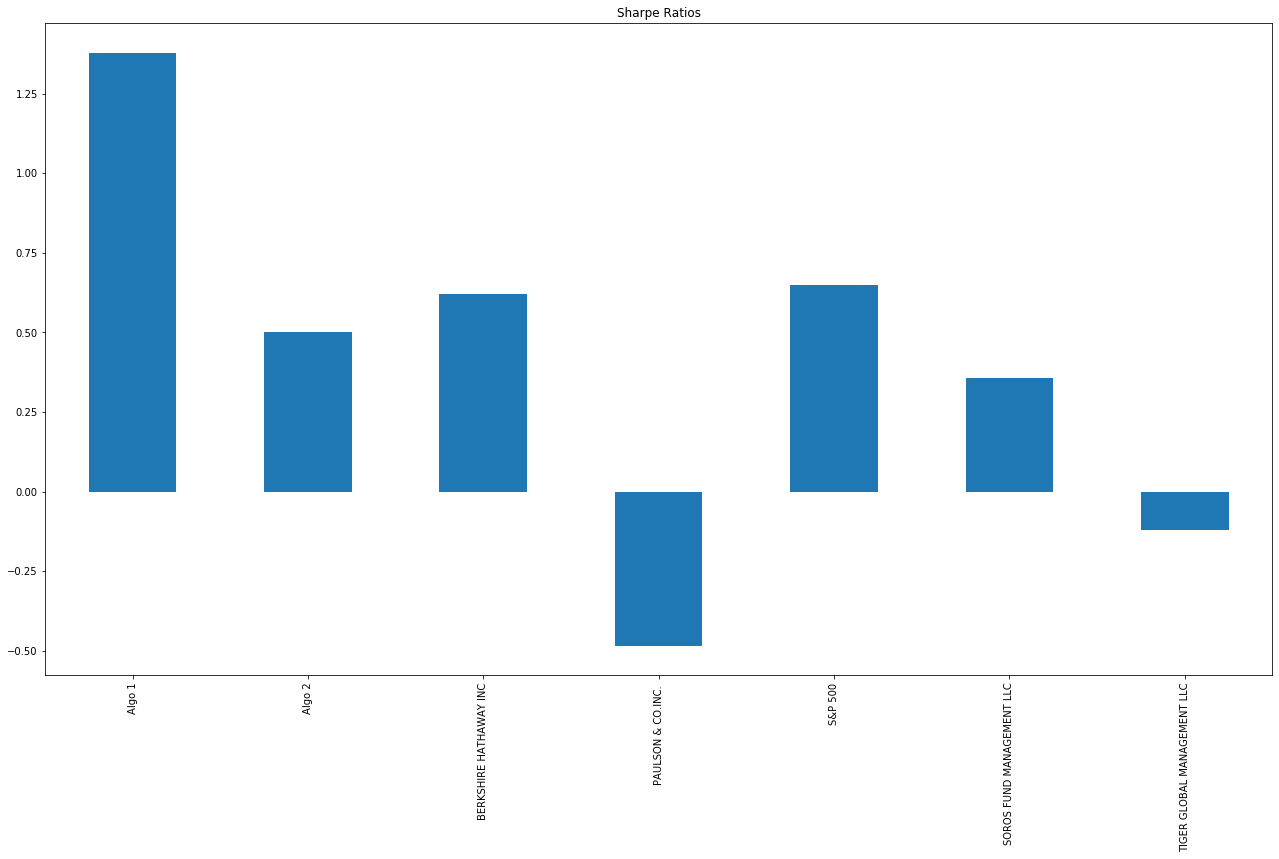

In [1650]:
sharpe_ratios.plot(kind = 'bar', figsize = (22,12), title = 'Sharpe Ratios')

In [1651]:
dominos_filepath = Path('../python_pandas_homework/historical_quotes_custom_portfolio/dominos_historical_data.csv')
jpm_filepath = Path('../python_pandas_homework/historical_quotes_custom_portfolio/jpm_historical_data.csv')
marvel_filepath = Path('../python_pandas_homework/historical_quotes_custom_portfolio/marvel_historical_data.csv')
nike_filepath = Path('../python_pandas_homework/historical_quotes_custom_portfolio/nike_historical_data.csv')
sarepta_therapeutics_filepath = Path('../python_pandas_homework/historical_quotes_custom_portfolio/sarepta_therapeutics_historical_data.csv')



In [1652]:
dominos_csv = pd.read_csv(dominos_filepath, index_col = 'date', parse_dates = True, infer_datetime_format = True)
dominos_csv = dominos_csv.drop(columns =['volume','open','high','low'])
dominos_csv.head()

,close
date,
2019-08-15 12:42:00,236.60
2019-08-13 00:00:00,240.60
2019-08-12 00:00:00,240.01
2019-08-09 00:00:00,247.83
2019-08-08 00:00:00,246.75


In [1653]:
jpm_csv = pd.read_csv(jpm_filepath, index_col = 'date', parse_dates = True, infer_datetime_format = True)
jpm_csv = jpm_csv.drop(columns =['volume','open','high','low'])
jpm_csv.head()


,close
date,
2019-08-15 12:34:00,105.075
2019-08-13 00:00:00,109.340
2019-08-12 00:00:00,107.680
2019-08-09 00:00:00,109.740
2019-08-08 00:00:00,109.860


In [1654]:
marvel_csv = pd.read_csv(marvel_filepath, index_col = 'date', parse_dates = True, infer_datetime_format = True)
marvel_csv = marvel_csv.drop(columns =['volume','open','high','low'])
marvel_csv.head()


,close
date,
2019-08-15 12:51:00,24.435
2019-08-13 00:00:00,25.140
2019-08-12 00:00:00,23.920
2019-08-09 00:00:00,24.720
2019-08-08 00:00:00,25.360


In [1655]:
nike_csv = pd.read_csv(nike_filepath, index_col = 'date', parse_dates = True, infer_datetime_format = True)
nike_csv = nike_csv.drop(columns =['volume','open','high','low'])
nike_csv.head()

,close
date,
2019-08-15 12:40:00,81.52
2019-08-13 00:00:00,83.32
2019-08-12 00:00:00,81.65
2019-08-09 00:00:00,81.98
2019-08-08 00:00:00,83.00


In [1656]:
sarepta_therapeutics_csv = pd.read_csv(sarepta_therapeutics_filepath, index_col = 'date', parse_dates = True, infer_datetime_format = True)
sarepta_therapeutics_csv = sarepta_therapeutics_csv.drop(columns =['volume','open','high','low'])
sarepta_therapeutics_csv.head()

,close
date,
2019-08-15 12:49:00,123.59
2019-08-13 00:00:00,126.15
2019-08-12 00:00:00,124.14
2019-08-09 00:00:00,126.11
2019-08-08 00:00:00,132.98


In [1657]:
combined_df = pd.concat([dominos_csv,jpm_csv,marvel_csv,nike_csv,sarepta_therapeutics_csv], axis = 1, join = 'inner')
combined_df.columns = ['DPZ', 'JPM', 'MRVL','NKE','SRPT']
combined_df.head()

,DPZ,JPM,MRVL,NKE,SRPT
date,,,,,
2019-08-13,240.60,109.34,25.14,83.32,126.15
2019-08-12,240.01,107.68,23.92,81.65,124.14
2019-08-09,247.83,109.74,24.72,81.98,126.11
2019-08-08,246.75,109.86,25.36,83.00,132.98
2019-08-07,245.74,108.03,24.70,81.28,142.26


In [1658]:
combined_df.tail()

,DPZ,JPM,MRVL,NKE,SRPT
date,,,,,
2014-08-19,75.15,57.56,13.49,39.255,22.36
2014-08-18,75.04,57.23,13.43,39.275,22.35
2014-08-15,74.55,56.75,13.33,38.565,22.47
2014-08-14,74.75,56.98,13.33,38.650,22.36
2014-08-13,74.49,56.72,13.26,38.625,22.35


In [1659]:
combined_df.isnull().sum()

DPZ     0
JPM     0
MRVL    0
NKE     0
SRPT    0
dtype: int64

In [1660]:
combined_df.duplicated(keep ='first').sum()

0

In [1661]:
all_returns_custom = combined_df.pct_change()
all_returns_custom.head()

,DPZ,JPM,MRVL,NKE,SRPT
date,,,,,
2019-08-13,NaN,NaN,NaN,NaN,NaN
2019-08-12,-0.002452,-0.015182,-0.048528,-0.020043,-0.015933
2019-08-09,0.032582,0.019131,0.033445,0.004042,0.015869
2019-08-08,-0.004358,0.001093,0.025890,0.012442,0.054476
2019-08-07,-0.004093,-0.016658,-0.026025,-0.020723,0.069785


In [1662]:
all_returns_custom = all_returns_custom.dropna()
all_returns_custom.head()

,DPZ,JPM,MRVL,NKE,SRPT
date,,,,,
2019-08-12,-0.002452,-0.015182,-0.048528,-0.020043,-0.015933
2019-08-09,0.032582,0.019131,0.033445,0.004042,0.015869
2019-08-08,-0.004358,0.001093,0.025890,0.012442,0.054476
2019-08-07,-0.004093,-0.016658,-0.026025,-0.020723,0.069785
2019-08-06,-0.013144,0.022216,-0.017409,0.000246,0.008787


In [1663]:
all_returns_custom = all_returns_custom.sort_index()
all_returns_custom.head()

,DPZ,JPM,MRVL,NKE,SRPT
date,,,,,
2014-08-13,-0.003478,-0.004563,-0.005251,-0.000647,-0.000447
2014-08-14,0.002683,0.004053,0.000000,0.002204,-0.004895
2014-08-15,-0.006530,-0.008387,-0.007446,-0.018078,0.005369
2014-08-18,-0.001464,-0.005733,-0.004448,0.000509,-0.000447
2014-08-19,0.006563,-0.001388,-0.003693,-0.005069,0.029466


In [1664]:
weights = [0.03,0.05,0.85,0.04,0.03]
all_returns_custom = all_returns_custom.dot(weights)
all_returns_custom.head()

date
2014-08-13   -0.004835
2014-08-14    0.000224
2014-08-15   -0.007506
2014-08-18   -0.004104
2014-08-19   -0.002330
dtype: float64

In [1665]:
all_returns_joined = pd.concat([all_returns,all_returns_custom], axis = 1, join = 'inner')
all_returns_joined.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P 500,0
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949,-0.004539,-0.012580
2015-03-04,0.002230,0.003241,-0.002534,0.004213,-0.008589,0.002416,-0.004389,-0.015794
2015-03-05,0.004016,0.004076,0.002355,0.006726,-0.000955,0.004323,0.001196,0.000722
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098,-0.004957,-0.011460,-0.014174,0.002325
2015-03-09,0.000582,0.004225,0.005843,-0.001652,-0.005447,0.001303,0.003944,0.012076


In [1666]:
all_returns_joined = all_returns_joined.rename(columns = {0:"Custom_Portfolio"})
all_returns_joined.head()



,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P 500,Custom_Portfolio
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949,-0.004539,-0.012580
2015-03-04,0.002230,0.003241,-0.002534,0.004213,-0.008589,0.002416,-0.004389,-0.015794
2015-03-05,0.004016,0.004076,0.002355,0.006726,-0.000955,0.004323,0.001196,0.000722
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098,-0.004957,-0.011460,-0.014174,0.002325
2015-03-09,0.000582,0.004225,0.005843,-0.001652,-0.005447,0.001303,0.003944,0.012076


In [1667]:
all_returns_joined.tail()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P 500,Custom_Portfolio
2019-04-16,0.002699,0.000388,-0.000831,0.000837,-0.006945,0.002899,0.000509,-0.031610
2019-04-17,-0.002897,-0.006467,-0.004409,0.003222,-0.010301,-0.005228,-0.002274,0.001117
2019-04-18,0.001448,0.001222,0.000582,0.001916,-0.000588,-0.001229,0.001579,0.002056
2019-04-22,-0.002586,-0.007333,-0.003640,-0.001088,0.000677,-0.001936,0.001012,-0.011127
2019-04-23,0.007167,0.003485,0.006472,0.013278,0.004969,0.009622,0.008841,-0.013448


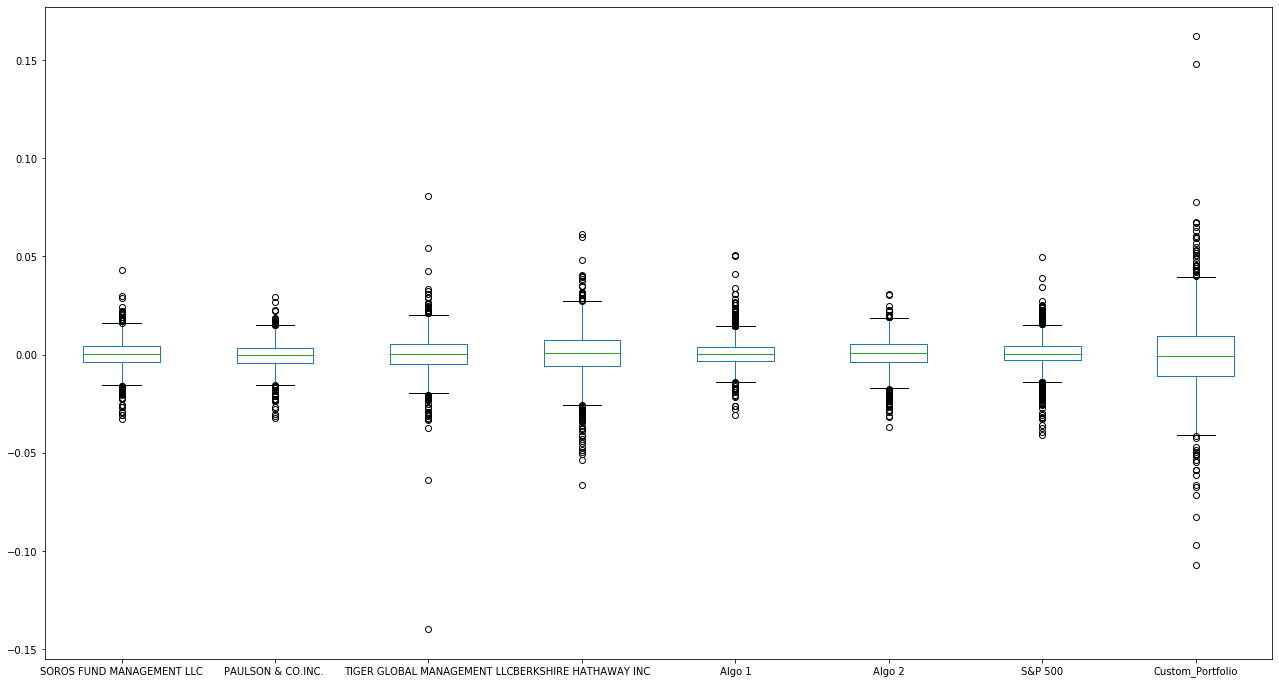

In [1668]:
all_returns_joined.plot(kind = 'box', figsize = (22,12))

In [1669]:
all_returns_joined_daily_std = all_returns_joined.std()
all_returns_joined_daily_std.head(10)

SOROS FUND MANAGEMENT LLC      0.007895
PAULSON & CO.INC.              0.007023
TIGER GLOBAL MANAGEMENT LLC    0.010894
BERKSHIRE HATHAWAY INC         0.012919
Algo 1                         0.007620
Algo 2                         0.008342
S&P 500                        0.008554
Custom_Portfolio               0.019943
dtype: float64

In [1670]:
all_returns_joined_annualized_std = all_returns_joined_daily_std * np.sqrt(252)
all_returns_joined_annualized_std.head(10)

SOROS FUND MANAGEMENT LLC      0.125335
PAULSON & CO.INC.              0.111488
TIGER GLOBAL MANAGEMENT LLC    0.172936
BERKSHIRE HATHAWAY INC         0.205077
Algo 1                         0.120967
Algo 2                         0.132430
S&P 500                        0.135786
Custom_Portfolio               0.316581
dtype: float64

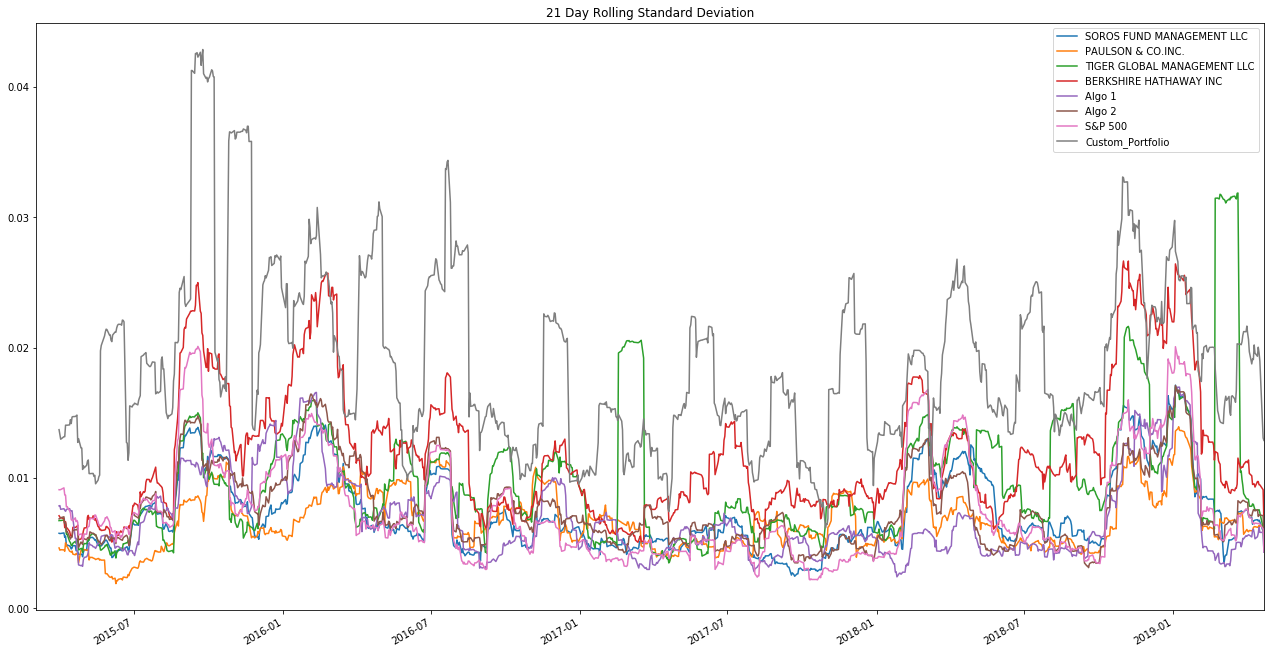

In [1671]:
all_returns_joined.rolling(window = 21).std().plot(title = '21 Day Rolling Standard Deviation', figsize= (22,12))

In [1672]:
custom_covariance = all_returns_joined['Custom_Portfolio'].cov(all_returns_joined['S&P 500'])
print(custom_covariance)

-1.7621506589906427e-06


In [1673]:
custom_variance = all_returns_joined['S&P 500'].var()
print(custom_variance)

7.316632424648712e-05


In [1674]:
custom_beta = custom_covariance / custom_variance
print(custom_beta)

-0.024084176390414304


In [1675]:
custom_sharpe_ratios = (all_returns_joined.mean() * 252) / all_returns_joined_annualized_std
print(custom_sharpe_ratios)


SOROS FUND MANAGEMENT LLC      0.356417
PAULSON & CO.INC.             -0.483570
TIGER GLOBAL MANAGEMENT LLC   -0.121060
BERKSHIRE HATHAWAY INC         0.621810
Algo 1                         1.378648
Algo 2                         0.501364
S&P 500                        0.648267
Custom_Portfolio              -0.193821
dtype: float64


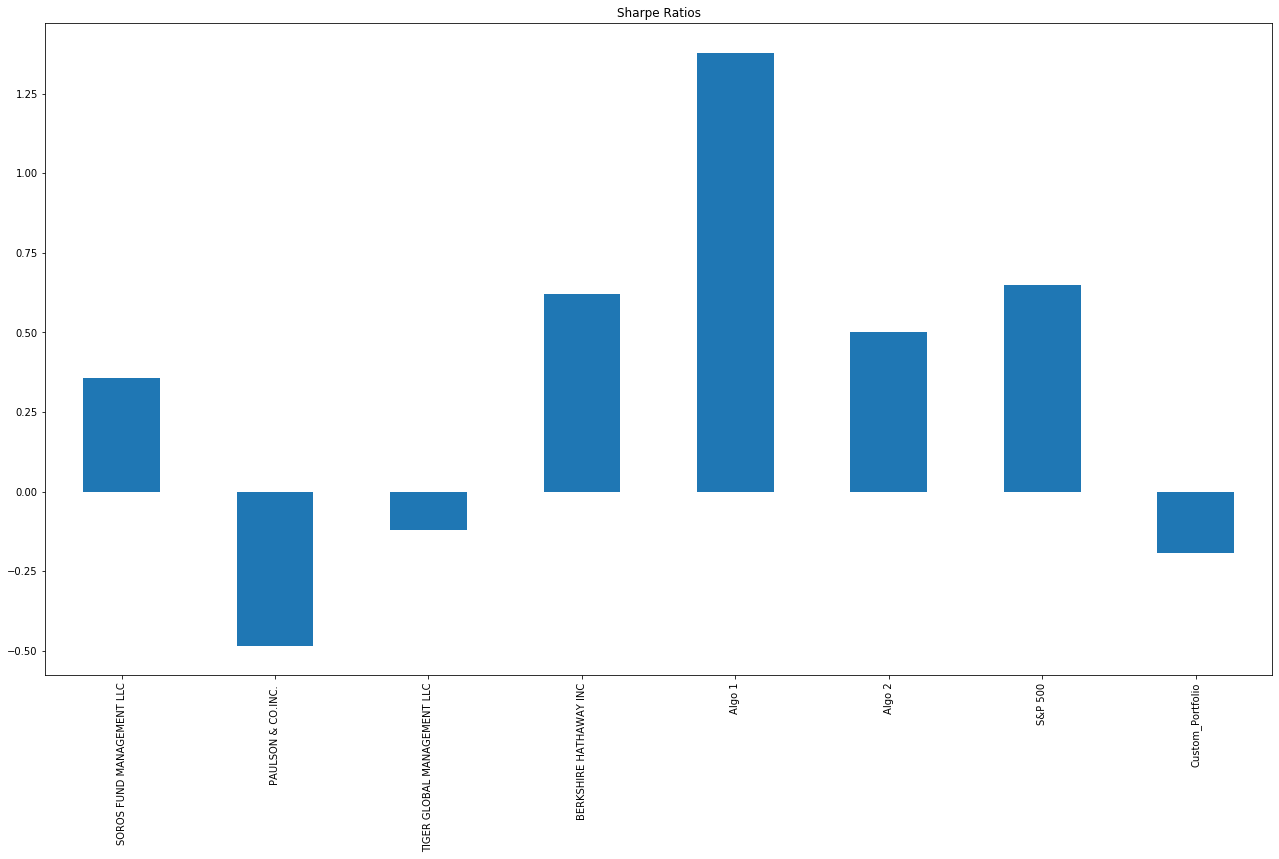

In [1676]:
custom_sharpe_ratios.plot(kind ='bar' , figsize = (22,12), title ='Sharpe Ratios')